In [1]:
import pandas as pd
df = pd.read_csv('customer_support_tickets.csv')
print(df.head())


   Ticket ID        Customer Name              Customer Email  Customer Age  \
0          1        Marisa Obrien  carrollallison@example.com            32   
1          2         Jessica Rios    clarkeashley@example.com            42   
2          3  Christopher Robbins   gonzalestracy@example.com            48   
3          4     Christina Dillon    bradleyolson@example.org            27   
4          5    Alexander Carroll     bradleymark@example.com            67   

  Customer Gender Product Purchased Date of Purchase      Ticket Type  \
0           Other        GoPro Hero       2021-03-22  Technical issue   
1          Female       LG Smart TV       2021-05-22  Technical issue   
2           Other          Dell XPS       2020-07-14  Technical issue   
3          Female  Microsoft Office       2020-11-13  Billing inquiry   
4          Female  Autodesk AutoCAD       2020-02-04  Billing inquiry   

             Ticket Subject  \
0             Product setup   
1  Peripheral compatibil

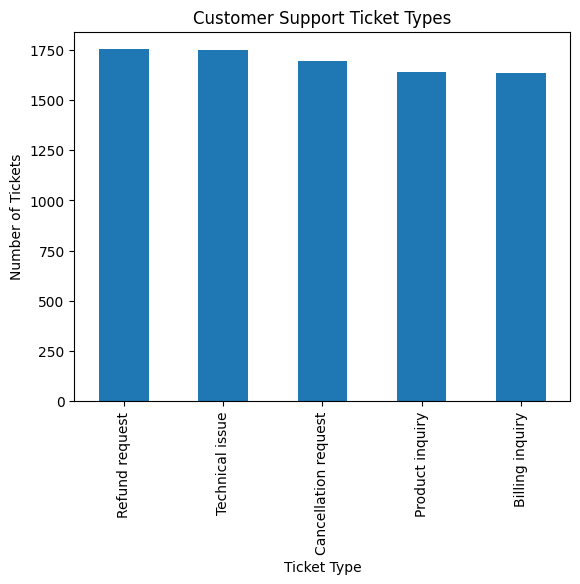

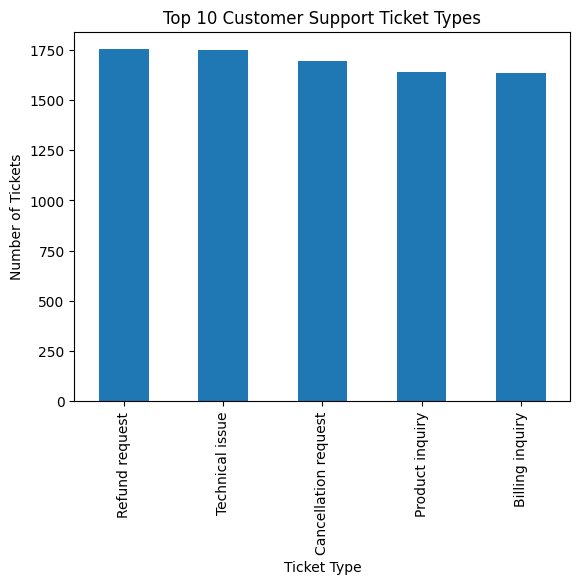

In [4]:
import matplotlib.pyplot as plt

category_counts = df['Ticket Type'].value_counts()

category_counts.plot(kind='bar')
plt.title('Customer Support Ticket Types')
plt.xlabel('Ticket Type')
plt.ylabel('Number of Tickets')
plt.show()


category_counts[:10].plot(kind='bar')
plt.title('Top 10 Customer Support Ticket Types')
plt.xlabel('Ticket Type')
plt.ylabel('Number of Tickets')
plt.show()


In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
import string

nltk.download('stopwords')
from nltk.corpus import stopwords

df = pd.read_csv("customer_support_tickets.csv")  # <-- Your file path here
df = df[['Ticket Subject', 'Resolution']].dropna()


def clean_text(text):
    text = text.lower()
    text = ''.join([c for c in text if c not in string.punctuation])
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)


df['Clean Subject'] = df['Ticket Subject'].apply(clean_text)


vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Clean Subject'])


print("🔹 Welcome to SupportBot! Type your query or 'exit' to stop.")
while True:
    user_input = input("You: ")
    if user_input.lower() in ['exit', 'quit']:
        print("👋 Goodbye!")
        break


    user_clean = clean_text(user_input)
    user_vec = vectorizer.transform([user_clean])


    sim = cosine_similarity(user_vec, X)
    idx = sim.argmax()
    confidence = sim[0][idx]


    if confidence > 0.3:
        print("Bot:", df.iloc[idx]['Resolution'])
    else:
        print("Bot: Sorry, I couldn't find a good match. Try rephrasing your question.")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


🔹 Welcome to SupportBot! Type your query or 'exit' to stop.
You:  Why didn't I send him the invoice?
Bot: Sorry, I couldn't find a good match. Try rephrasing your question.
You:  can't find the 'Product_IP' field of the I'm concerned about the security of my ,GoPro Hero and would like to ensure that my data is safe.
Bot: West decision evidence bit.
You: I'm having an issue with the GoPro Hero. Please assist.
Bot: However financial development significant camera job every.
You: bye
Bot: Sorry, I couldn't find a good match. Try rephrasing your question.
You: exit
👋 Goodbye!
